In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  datasets, cross_validation, ensemble
from sklearn.svm import LinearSVR

In [6]:
# 使用sklearn自带的糖尿病数据
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,test_size=0.25,random_state=0)

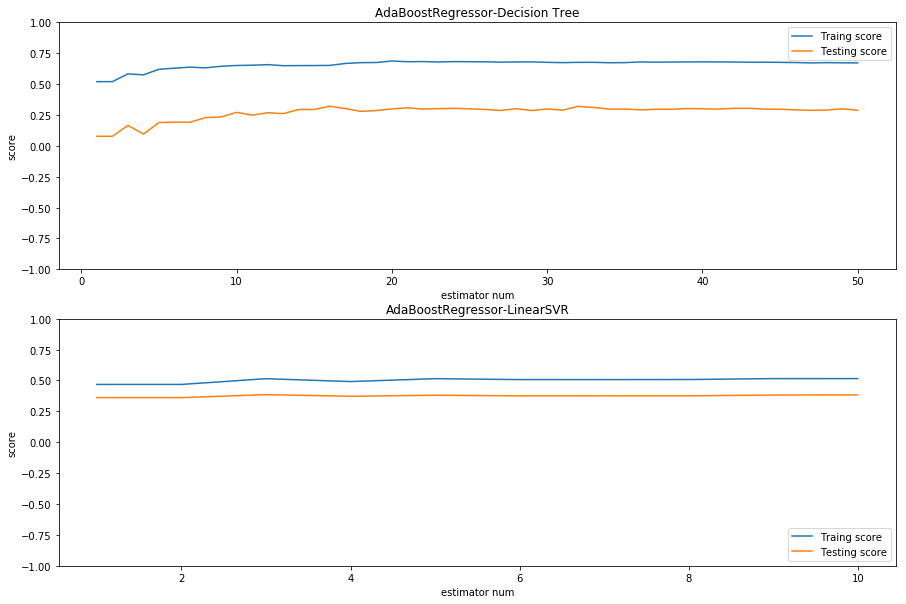

In [8]:
# 不同若回归器对结果的影响
def test_AdaBoostRegressor(*data):
        X_train,X_test,Y_train,Y_test = data
        fig = plt.figure()
        fig.set_figheight(10)
        fig.set_figwidth(15)

        regr = ensemble.AdaBoostRegressor()
        regr.fit(X_train,Y_train)
        ## 绘图 
        ax = fig.add_subplot(211)
        estimators_num = len(regr.estimators_)
        X = range(1, estimators_num+1)
        ax.plot(list(X), list(regr.staged_score(X_train,Y_train)),label='Traing score')
        ax.plot(list(X), list(regr.staged_score(X_test,Y_test)),label='Testing score')
        ax.set_xlabel('estimator num')
        ax.set_ylabel('score')
        ax.set_ylim(-1,1)
        ax.legend(loc='best')
        ax.set_title('AdaBoostRegressor-Decision Tree')
        
        ## LinearSVR
        regr = ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=0.01,C=100))
        regr.fit(X_train,Y_train)
        ## 绘图 
        ax = fig.add_subplot(212)
        estimators_num = len(regr.estimators_)
        X = range(1, estimators_num+1)
        ax.plot(list(X), list(regr.staged_score(X_train,Y_train)),label='Traing score')
        ax.plot(list(X), list(regr.staged_score(X_test,Y_test)),label='Testing score')
        ax.set_xlabel('estimator num')
        ax.set_ylabel('score')
        ax.set_ylim(-1,1)
        ax.legend(loc='lower right')
        ax.set_title('AdaBoostRegressor-LinearSVR')
        
        
        
        plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_AdaBoostRegressor(X_train,X_test,Y_train,Y_test)
        

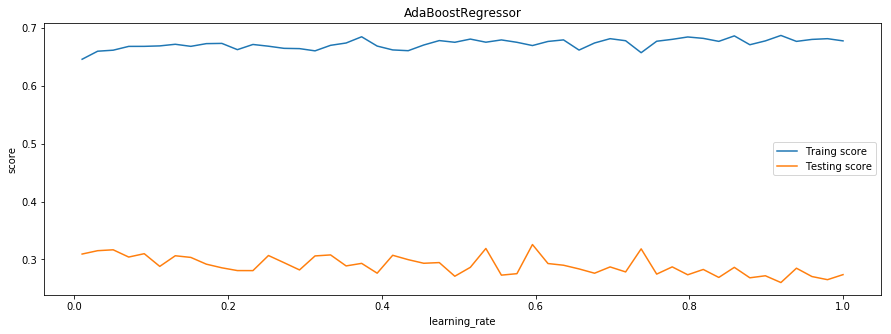

In [10]:
# 考虑学习率对结果的影响
def test_AdaBoostRegressor_learning_rate(*data):
    X_train,X_test,Y_train,Y_test = data
    learning_rates = np.linspace(0.01,1)
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    traing_score=[]
    testing_score=[]
    for learning_rate in learning_rates:
        gegr = ensemble.AdaBoostRegressor(learning_rate=learning_rate, n_estimators=500)
        gegr.fit(X_train,Y_train)
        traing_score.append(gegr.score(X_train,Y_train))
        testing_score.append(gegr.score(X_test,Y_test))
        
    ## 绘图 
    ax.plot(learning_rates, traing_score,  label='Traing score')
    ax.plot(learning_rates, testing_score, label='Testing score')
    ax.set_xlabel('learning_rate')
    ax.set_ylabel('score')
    ax.legend(loc='best')
    ax.set_title('AdaBoostRegressor')    
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_AdaBoostRegressor_learning_rate(X_train,X_test,Y_train,Y_test)

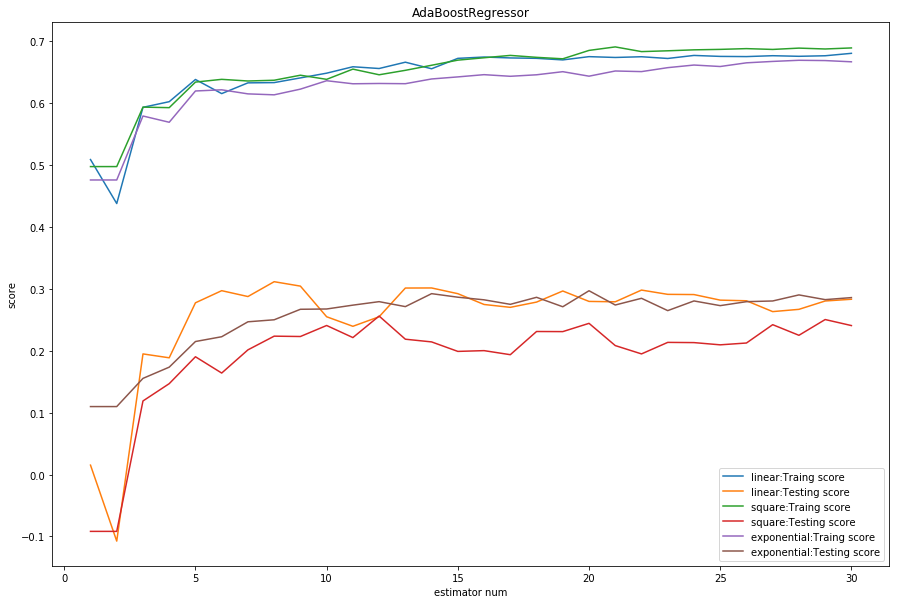

In [11]:
# 损失函数的影响：
# 不同若回归器对结果的影响
def test_AdaBoostRegressor_loss(*data):
        X_train,X_test,Y_train,Y_test = data
        fig = plt.figure()
        ax = fig.add_subplot(111)
        fig.set_figheight(10)
        fig.set_figwidth(15)
        losses = ('linear','square','exponential')
        for loss in losses:
            regr = ensemble.AdaBoostRegressor(loss=loss,n_estimators=30)
            regr.fit(X_train,Y_train)
            ## 绘图 
            estimators_num = len(regr.estimators_)
            X = range(1, estimators_num+1)
            ax.plot(list(X), list(regr.staged_score(X_train,Y_train)),label='{0}:Traing score'.format(loss))
            ax.plot(list(X), list(regr.staged_score(X_test,Y_test)),label='{0}:Testing score'.format(loss))
        ax.set_xlabel('estimator num')
        ax.set_ylabel('score')
        ax.legend(loc='best')
        ax.set_title('AdaBoostRegressor')
        plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_AdaBoostRegressor_loss(X_train,X_test,Y_train,Y_test)
        